In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
# load datasets into DataFrames
path = 'C:/Users/xinwa/OneDrive/Documents/Data Science/Capstone Project 2/data/'
salaries_by_college_major_df = pd.read_csv(path+'salaries_by_college_major_cleaned.csv')
salaries_by_college_type_df = pd.read_csv(path+'salaries_by_college_type_cleaned.csv')
salaries_by_region_df = pd.read_csv(path+'salaries_by_region_cleaned.csv')


In [190]:
salaries_by_college_major_df.shape, salaries_by_college_type_df.shape, salaries_by_region_df.shape

((50, 8), (269, 6), (320, 6))

In [191]:
salaries_by_college_major_df.dtypes

Undergraduate Major                                   object
Starting Median Salary                               float64
Mid-Career Median Salary                             float64
Percent change from Starting to Mid-Career Salary    float64
Mid-Career 10th Percentile Salary                    float64
Mid-Career 25th Percentile Salary                    float64
Mid-Career 75th Percentile Salary                    float64
Mid-Career 90th Percentile Salary                    float64
dtype: object

In [192]:
salaries_by_college_major_df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [193]:
def summary_statistic(df, col1, col2, func):
    func_result = func(df[col1])
    result = df.loc[df[col1]==func_result, col2]
    major_str = result.to_string(index=False).strip().replace('\n', ' or')
    return major_str, func_result

In [194]:
def print_out(str_list, explain_str, statistic):
    print('Graduates with major '+str_list, 'have '+explain_str, statistic)

In [195]:
# major with lowest starting median salary
major, statistic = summary_statistic(salaries_by_college_major_df, 'Starting Median Salary', 'Undergraduate Major', np.min)
print_out(major,'lowest Starting Median Salary', statistic)

# major with highest starting median salary
major, statistic = summary_statistic(salaries_by_college_major_df, 'Starting Median Salary', 'Undergraduate Major', np.max)
print_out(major, 'highest Starting Median Salary', statistic)

# major with lowest Percent change from Starting to Mid-Career Salary
major, statistic = summary_statistic(salaries_by_college_major_df, 'Percent change from Starting to Mid-Career Salary', 'Undergraduate Major', np.min)
print_out(major,'lowest percent change from Starting to Mid-Career Salary', str(statistic)+'%')

# major with highest Percent change from Starting to Mid-Career Salary
major, statistic = summary_statistic(salaries_by_college_major_df, 'Percent change from Starting to Mid-Career Salary', 'Undergraduate Major', np.max)
print_out(major,'highest percent change from Starting to Mid-Career Salary', str(statistic)+'%')


# major with lowest mid-career median salary
major, statistic = summary_statistic(salaries_by_college_major_df, 'Mid-Career Median Salary', 'Undergraduate Major', np.min)
print_out(major, 'lowest mid-career median salary', statistic)

# major with highest mid-career median salary
major, statistic = summary_statistic(salaries_by_college_major_df, 'Mid-Career Median Salary', 'Undergraduate Major', np.max)
print_out(major, 'highest mid-career median salary', statistic)

Graduates with major Spanish have lowest Starting Median Salary 34000.0
Graduates with major Physician Assistant have highest Starting Median Salary 74300.0
Graduates with major Physician Assistant have lowest percent change from Starting to Mid-Career Salary 23.4%
Graduates with major Math or Philosophy have highest percent change from Starting to Mid-Career Salary 103.5%
Graduates with major Education or  Religion have lowest mid-career median salary 52000.0
Graduates with major Chemical Engineering have highest mid-career median salary 107000.0


In [196]:
salaries_by_college_type_df.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,99200.0,168000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,104000.0,161000.0
2,Harvey Mudd College,Engineering,71800.0,122000.0,96000.0,180000.0
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,94300.0,143000.0
4,Cooper Union,Engineering,62200.0,114000.0,80200.0,142000.0


In [197]:
salaries_by_college_type_df['School Type'].value_counts()

State           175
Liberal Arts     47
Party            20
Engineering      19
Ivy League        8
Name: School Type, dtype: int64

In [198]:
salaries_by_college_type_df.groupby(by='School Type').mean()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary
School Type,,,,
Engineering,59057.894737,103842.105263,81384.210526,134868.421053
Ivy League,60475.000000,120125.000000,82787.500000,184125.000000
Liberal Arts,45746.808511,89378.723404,61936.170213,131076.595745
Party,45715.000000,84685.000000,60005.000000,118100.000000
State,44126.285714,78567.428571,56689.714286,106970.857143


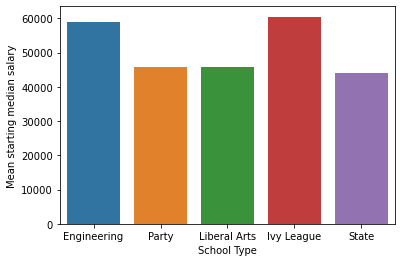

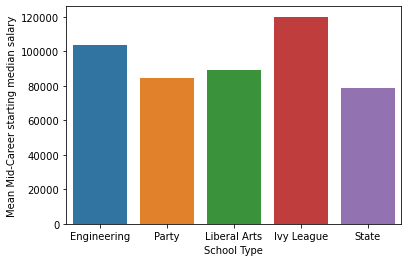

In [216]:
ax = sns.barplot(x='School Type', y='Starting Median Salary', data=salaries_by_college_type_df, \
                 estimator = np.mean, ci=None)
ax.set_ylabel('Mean starting median salary')
plt.show()
ax = sns.barplot(x='School Type', y='Mid-Career Median Salary', data=salaries_by_college_type_df, \
                 estimator = np.mean, ci=None)
ax.set_ylabel('Mean Mid-Career starting median salary')
plt.show()

In [217]:
sub_df1 = salaries_by_college_type_df[['School Type', 'Starting Median Salary']]
sub_df1['salary_type']='Starting Median Salary'
sub_df1.rename({'Starting Median Salary':'salary'}, axis=1, inplace=True)
sub_df2 = salaries_by_college_type_df[['School Type', 'Mid-Career Median Salary']]
sub_df2['salary_type']='Mid-Career Median Salary'
sub_df2.rename({'Mid-Career Median Salary':'salary'}, axis=1, inplace=True)
sub_df=sub_df1.append(sub_df2, ignore_index=True)
sub_df.head(5), sub_df.tail(5)


C:\Users\xinwa\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\xinwa\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\xinwa\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

(   School Type   salary             salary_type
 0  Engineering  72200.0  Starting Median Salary
 1  Engineering  75500.0  Starting Median Salary
 2  Engineering  71800.0  Starting Median Salary
 3  Engineering  62400.0  Starting Median Salary
 4  Engineering  62200.0  Starting Median Salary,
     School Type   salary               salary_type
 533       State  59200.0  Mid-Career Median Salary
 534       State  58200.0  Mid-Career Median Salary
 535       State  56500.0  Mid-Career Median Salary
 536       State  50600.0  Mid-Career Median Salary
 537       State  43900.0  Mid-Career Median Salary)

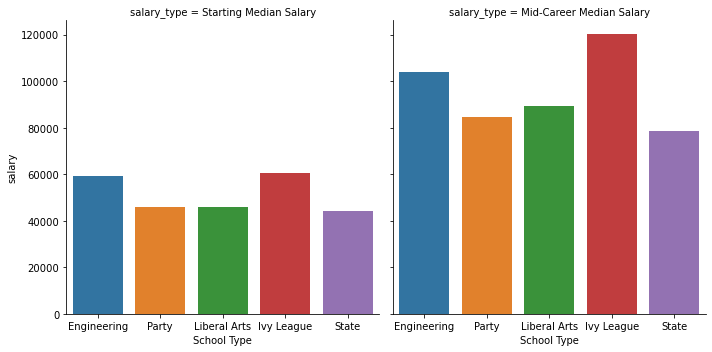

In [45]:
sns.catplot(x='School Type', y='salary', data=sub_df, kind='bar', col='salary_type', ci=None)
plt.tight_layout()

Observations: Graduates from Ivy League schools have the highest mean statrting median salary $60475 and also the highest 
              mid-career median salary $120125. Graduates from State schools have the lowest mean statrting median salary 
              $44126.29 and also the lowest mid-career median salary $78567.43

In [199]:
corr = salaries_by_college_type_df.corr()
corr

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary
Starting Median Salary,1.000000,0.889698,0.905414,0.762167
Mid-Career Median Salary,0.889698,1.000000,0.919132,0.917914
Mid-Career 25th Percentile Salary,0.905414,0.919132,1.000000,0.769967
Mid-Career 75th Percentile Salary,0.762167,0.917914,0.769967,1.000000


<AxesSubplot:>

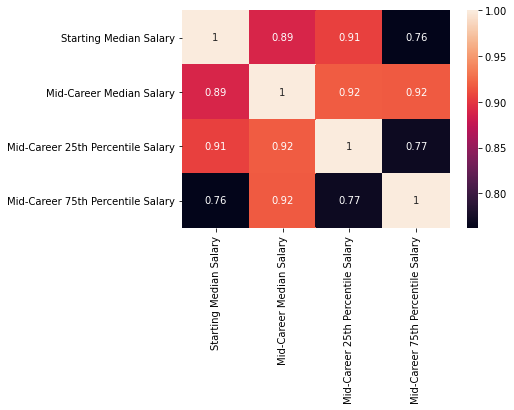

In [200]:
sns.heatmap(corr, annot=True)

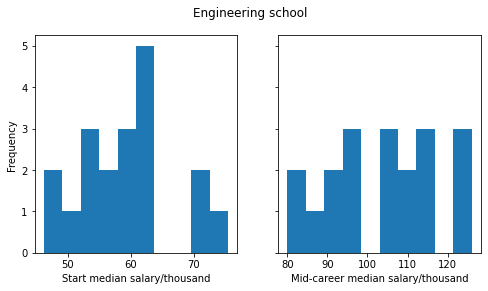

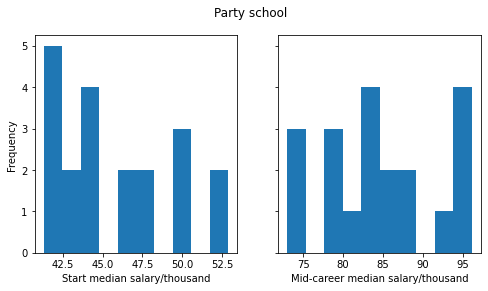

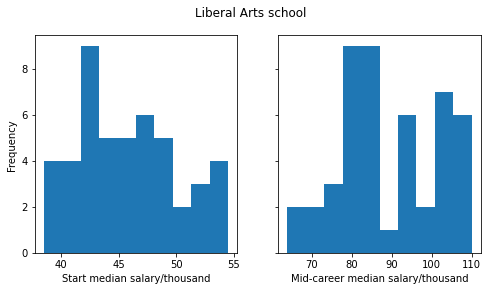

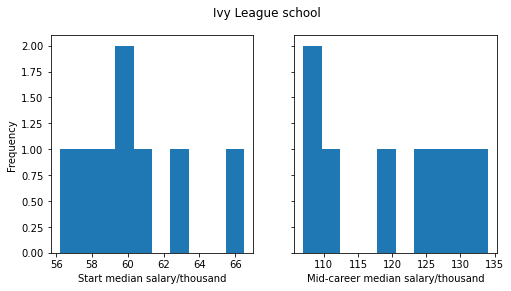

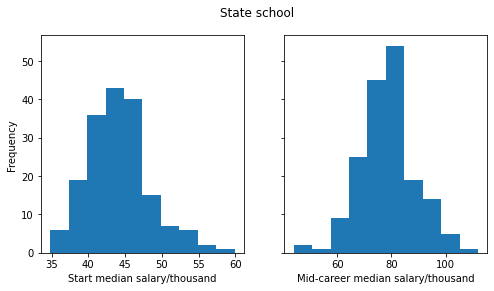

In [201]:
school_types = salaries_by_college_type_df['School Type'].unique()
counts = len(school_types)

for type in school_types:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey = True)
    fig.suptitle(type+' school')
    ax1.hist(salaries_by_college_type_df[salaries_by_college_type_df['School Type']==type]['Starting Median Salary']/1000)
    ax2.hist(salaries_by_college_type_df[salaries_by_college_type_df['School Type']==type]['Mid-Career Median Salary']/1000)
    
    ax1.set_xlabel('Start median salary/thousand')
    ax2.set_xlabel('Mid-career median salary/thousand')
    ax1.set_ylabel('Frequency')
    plt.subplots_adjust(hspace=0.5)
    plt.show
   

<AxesSubplot:xlabel='Starting Median Salary', ylabel='Mid-Career Median Salary'>

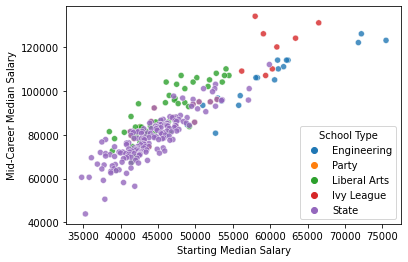

In [202]:
sns.scatterplot(x = 'Starting Median Salary', y = 'Mid-Career Median Salary', data = salaries_by_college_type_df, \
                hue='School Type', alpha = 0.8)

Observation: the starting median salary and mid-career median salary of all school types except Ivy League schools have almost linear realtionships. 

Analysis for salaries by region

In [204]:
salaries_by_region_df.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary
0,Stanford University,California,70400.0,129000.0,93100.0,184000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,104000.0,161000.0
2,Harvey Mudd College,California,71800.0,122000.0,96000.0,180000.0
3,"University of California, Berkeley",California,59900.0,112000.0,81000.0,149000.0
4,Occidental College,California,51900.0,105000.0,54800.0,157000.0


In [205]:
salaries_by_region_df['Region'].value_counts()

Northeastern    100
Southern         79
Midwestern       71
Western          42
California       28
Name: Region, dtype: int64

In [206]:
salaries_by_region_df.groupby(by='Region').mean()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary
Region,,,,
California,51032.142857,93132.142857,67153.571429,127350.000000
Midwestern,44225.352113,78180.281690,57026.760563,107594.366197
Northeastern,48496.000000,91352.000000,65479.000000,129576.000000
Southern,44521.518987,79505.063291,57506.329114,109662.025316
Western,44414.285714,78200.000000,56580.952381,106026.190476


<ipython-input-222-aef6f57d10ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df1['salary_type']='Starting Median Salary'
<ipython-input-222-aef6f57d10ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df2['salary_type']='Mid-Career Median Salary'


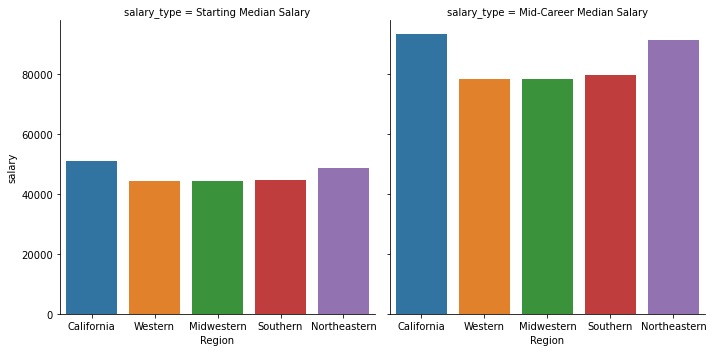

In [222]:
sub_df1 = salaries_by_region_df[['Region', 'Starting Median Salary']]
sub_df1['salary_type']='Starting Median Salary'
sub_df1.rename({'Starting Median Salary':'salary'}, axis=1, inplace=True)
sub_df2 = salaries_by_region_df[['Region', 'Mid-Career Median Salary']]
sub_df2['salary_type']='Mid-Career Median Salary'
sub_df2.rename({'Mid-Career Median Salary':'salary'}, axis=1, inplace=True)
sub_df=sub_df1.append(sub_df2, ignore_index=True)

sns.catplot(x='Region', y='salary', data=sub_df, kind='bar', col='salary_type', ci=None)
plt.tight_layout()

Observations: Graduates from colleges located in California region have the highest mean statrting median salary $51032.
              Graduates from colleges located in Northeastern have the highest mean mid-career median salary $91352. 
              Graduates from colleges located in Midwest Region have the lowest mean starting median salary $44225 and also
              have the lowest mid-career median salary $78180.

In [208]:
corr = salaries_by_region_df.corr()
corr

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary
Starting Median Salary,1.000000,0.881616,0.896774,0.776640
Mid-Career Median Salary,0.881616,1.000000,0.928000,0.927777
Mid-Career 25th Percentile Salary,0.896774,0.928000,1.000000,0.806560
Mid-Career 75th Percentile Salary,0.776640,0.927777,0.806560,1.000000


<AxesSubplot:>

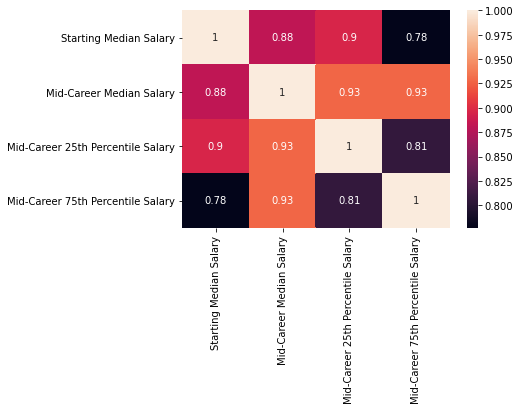

In [209]:
sns.heatmap(corr, annot=True)

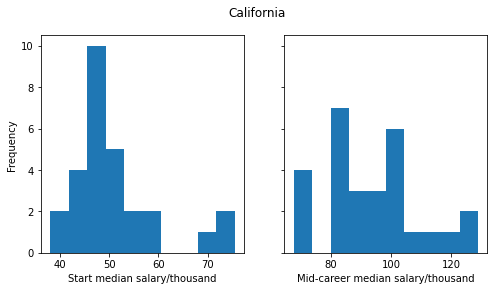

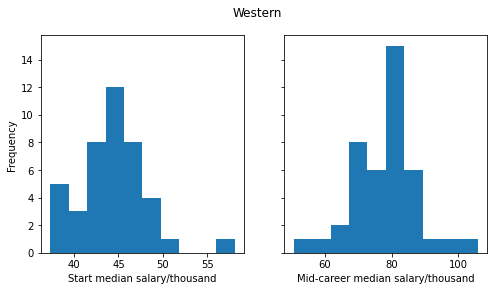

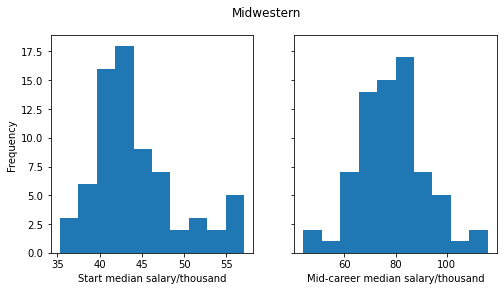

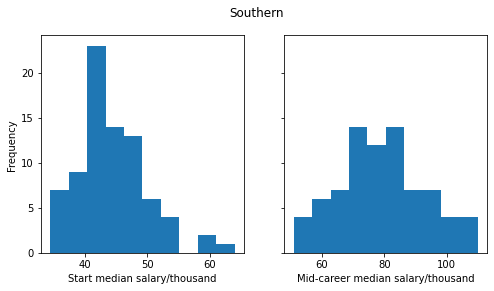

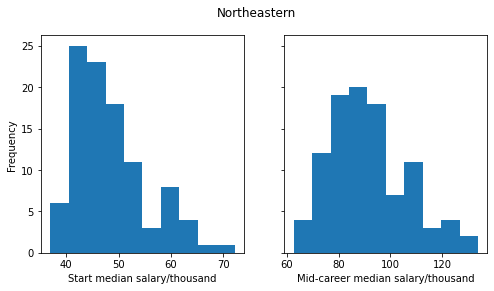

In [212]:
regions = salaries_by_region_df['Region'].unique()

for region in regions:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey = True)
    fig.suptitle(region)
    ax1.hist(salaries_by_region_df[salaries_by_region_df['Region']==region]['Starting Median Salary']/1000)
    ax2.hist(salaries_by_region_df[salaries_by_region_df['Region']==region]['Mid-Career Median Salary']/1000)
    
    ax1.set_xlabel('Start median salary/thousand')
    ax2.set_xlabel('Mid-career median salary/thousand')
    ax1.set_ylabel('Frequency')
    plt.subplots_adjust(hspace=0.5)
    plt.show
   

<AxesSubplot:xlabel='Starting Median Salary', ylabel='Mid-Career Median Salary'>

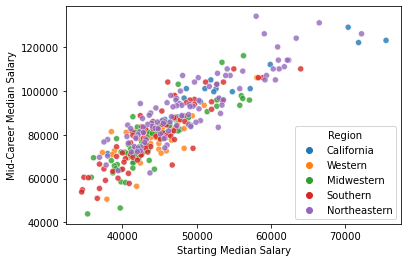

In [213]:
sns.scatterplot(x = 'Starting Median Salary', y = 'Mid-Career Median Salary', data = salaries_by_region_df, \
                hue='Region', alpha = 0.8)

Observation: the starting median salary and mid-career median salary of schools in different regions have almost linear realtionships. 